CA2 - Minors
# AIM :To analyze the various factors affecting student academic performance by performing data cleaning and exploratory data visualization, and to identify key attributes that significantly influence exam scores.

In [1]:
import pandas as pd
df = pd.read_csv('/content/StudentPerformanceFactors.csv')
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [2]:
df.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [3]:
# ------------------------------
# 🧹 STEP 1: DATA CLEANING
# ------------------------------

# Check null values
print("Missing values:\n", df.isnull().sum())

# Fill missing categorical with mode
df['Teacher_Quality'] = df['Teacher_Quality'].fillna(df['Teacher_Quality'].mode()[0])
df['Parental_Education_Level'] = df['Parental_Education_Level'].fillna(df['Parental_Education_Level'].mode()[0])
df['Distance_from_Home'] = df['Distance_from_Home'].fillna(df['Distance_from_Home'].mode()[0])

# Convert categorical columns to category dtype
categorical_cols = ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities',
                    'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality',
                    'School_Type', 'Peer_Influence', 'Learning_Disabilities', 'Parental_Education_Level',
                    'Distance_from_Home', 'Gender']

for col in categorical_cols:
    df[col] = df[col].astype('category')


Missing values:
 Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Drop rows with missing values
df_cleaned = df.dropna()

# Confirm missing values are gone
print(df_cleaned.isnull().sum())


Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64


# 📊 2. Visualizations

1. Distribution of Exam Scores

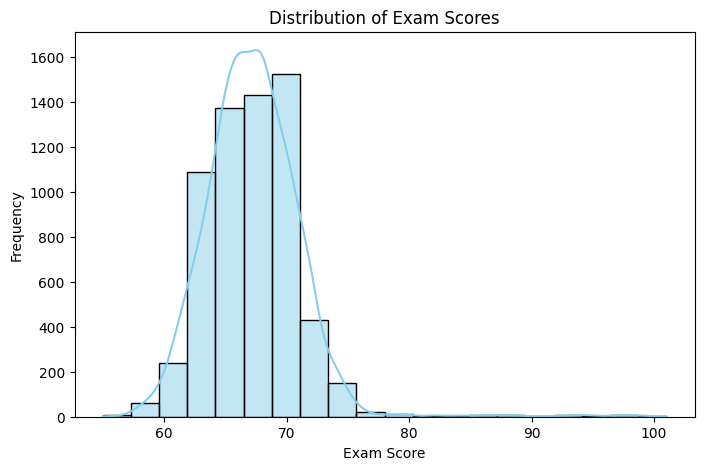

In [6]:
plt.figure(figsize=(8, 5))
sns.histplot(df_cleaned['Exam_Score'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Exam Scores')
plt.xlabel('Exam Score')
plt.ylabel('Frequency')
plt.show()


2. Correlation Heatmap (Numerical Features Only)

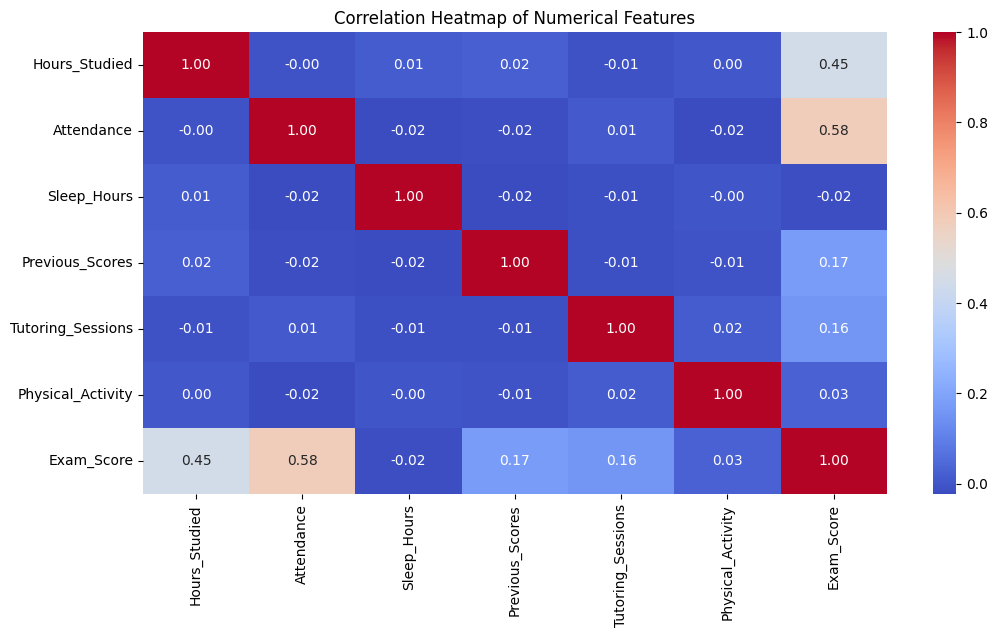

In [7]:
plt.figure(figsize=(12, 6))
numerical_cols = df_cleaned.select_dtypes(include=['int64', 'float64']).columns
sns.heatmap(df_cleaned[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


 3. Box Plot: Categorical Features vs Exam Score

<ipython-input-8-c169f09d727b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x='Parental_Involvement', y='Exam_Score', palette='Set2')


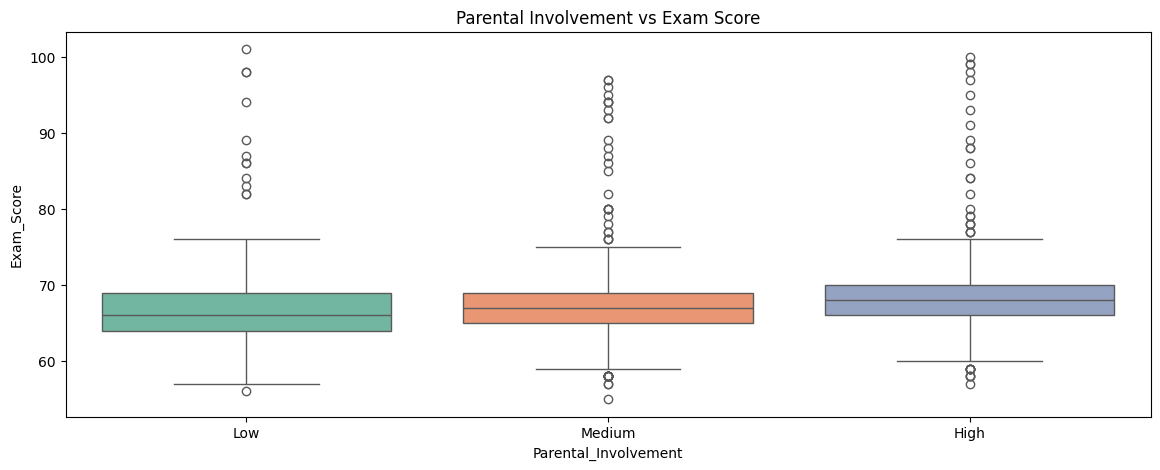

<ipython-input-8-c169f09d727b>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x='Access_to_Resources', y='Exam_Score', palette='Set3')


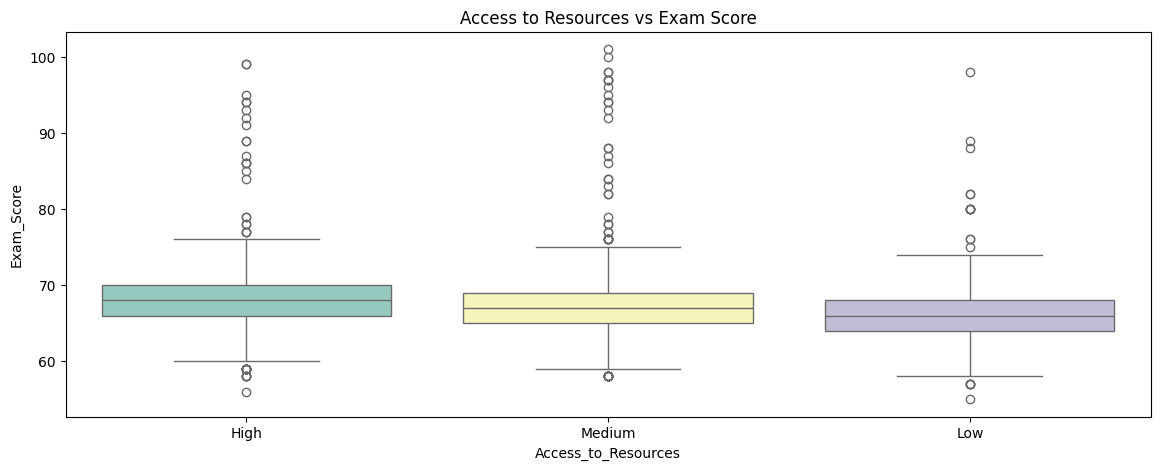

In [8]:
plt.figure(figsize=(14, 5))
sns.boxplot(data=df_cleaned, x='Parental_Involvement', y='Exam_Score', palette='Set2')
plt.title('Parental Involvement vs Exam Score')
plt.show()

plt.figure(figsize=(14, 5))
sns.boxplot(data=df_cleaned, x='Access_to_Resources', y='Exam_Score', palette='Set3')
plt.title('Access to Resources vs Exam Score')
plt.show()


4. Gender-based Comparison

<ipython-input-9-e7016f4c19eb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x='Gender', y='Exam_Score', palette='pastel')


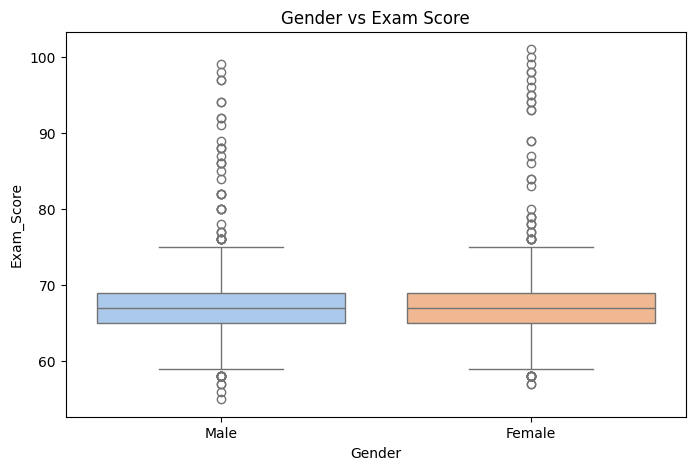

In [9]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_cleaned, x='Gender', y='Exam_Score', palette='pastel')
plt.title('Gender vs Exam Score')
plt.show()


5. Parental Education Level Impact

<ipython-input-10-95b7814eab39>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x='Parental_Education_Level', y='Exam_Score', palette='coolwarm')


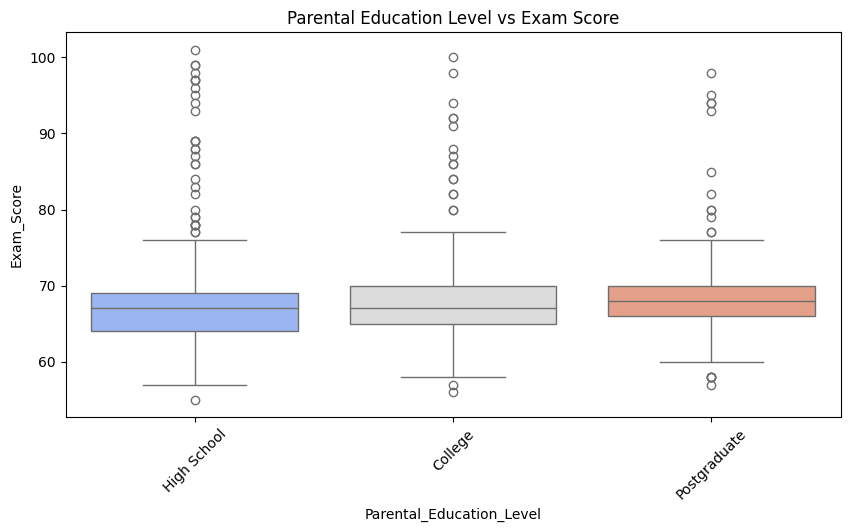

In [10]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_cleaned, x='Parental_Education_Level', y='Exam_Score', palette='coolwarm')
plt.title('Parental Education Level vs Exam Score')
plt.xticks(rotation=45)
plt.show()


6. Pair Plot (Numerical Overview)

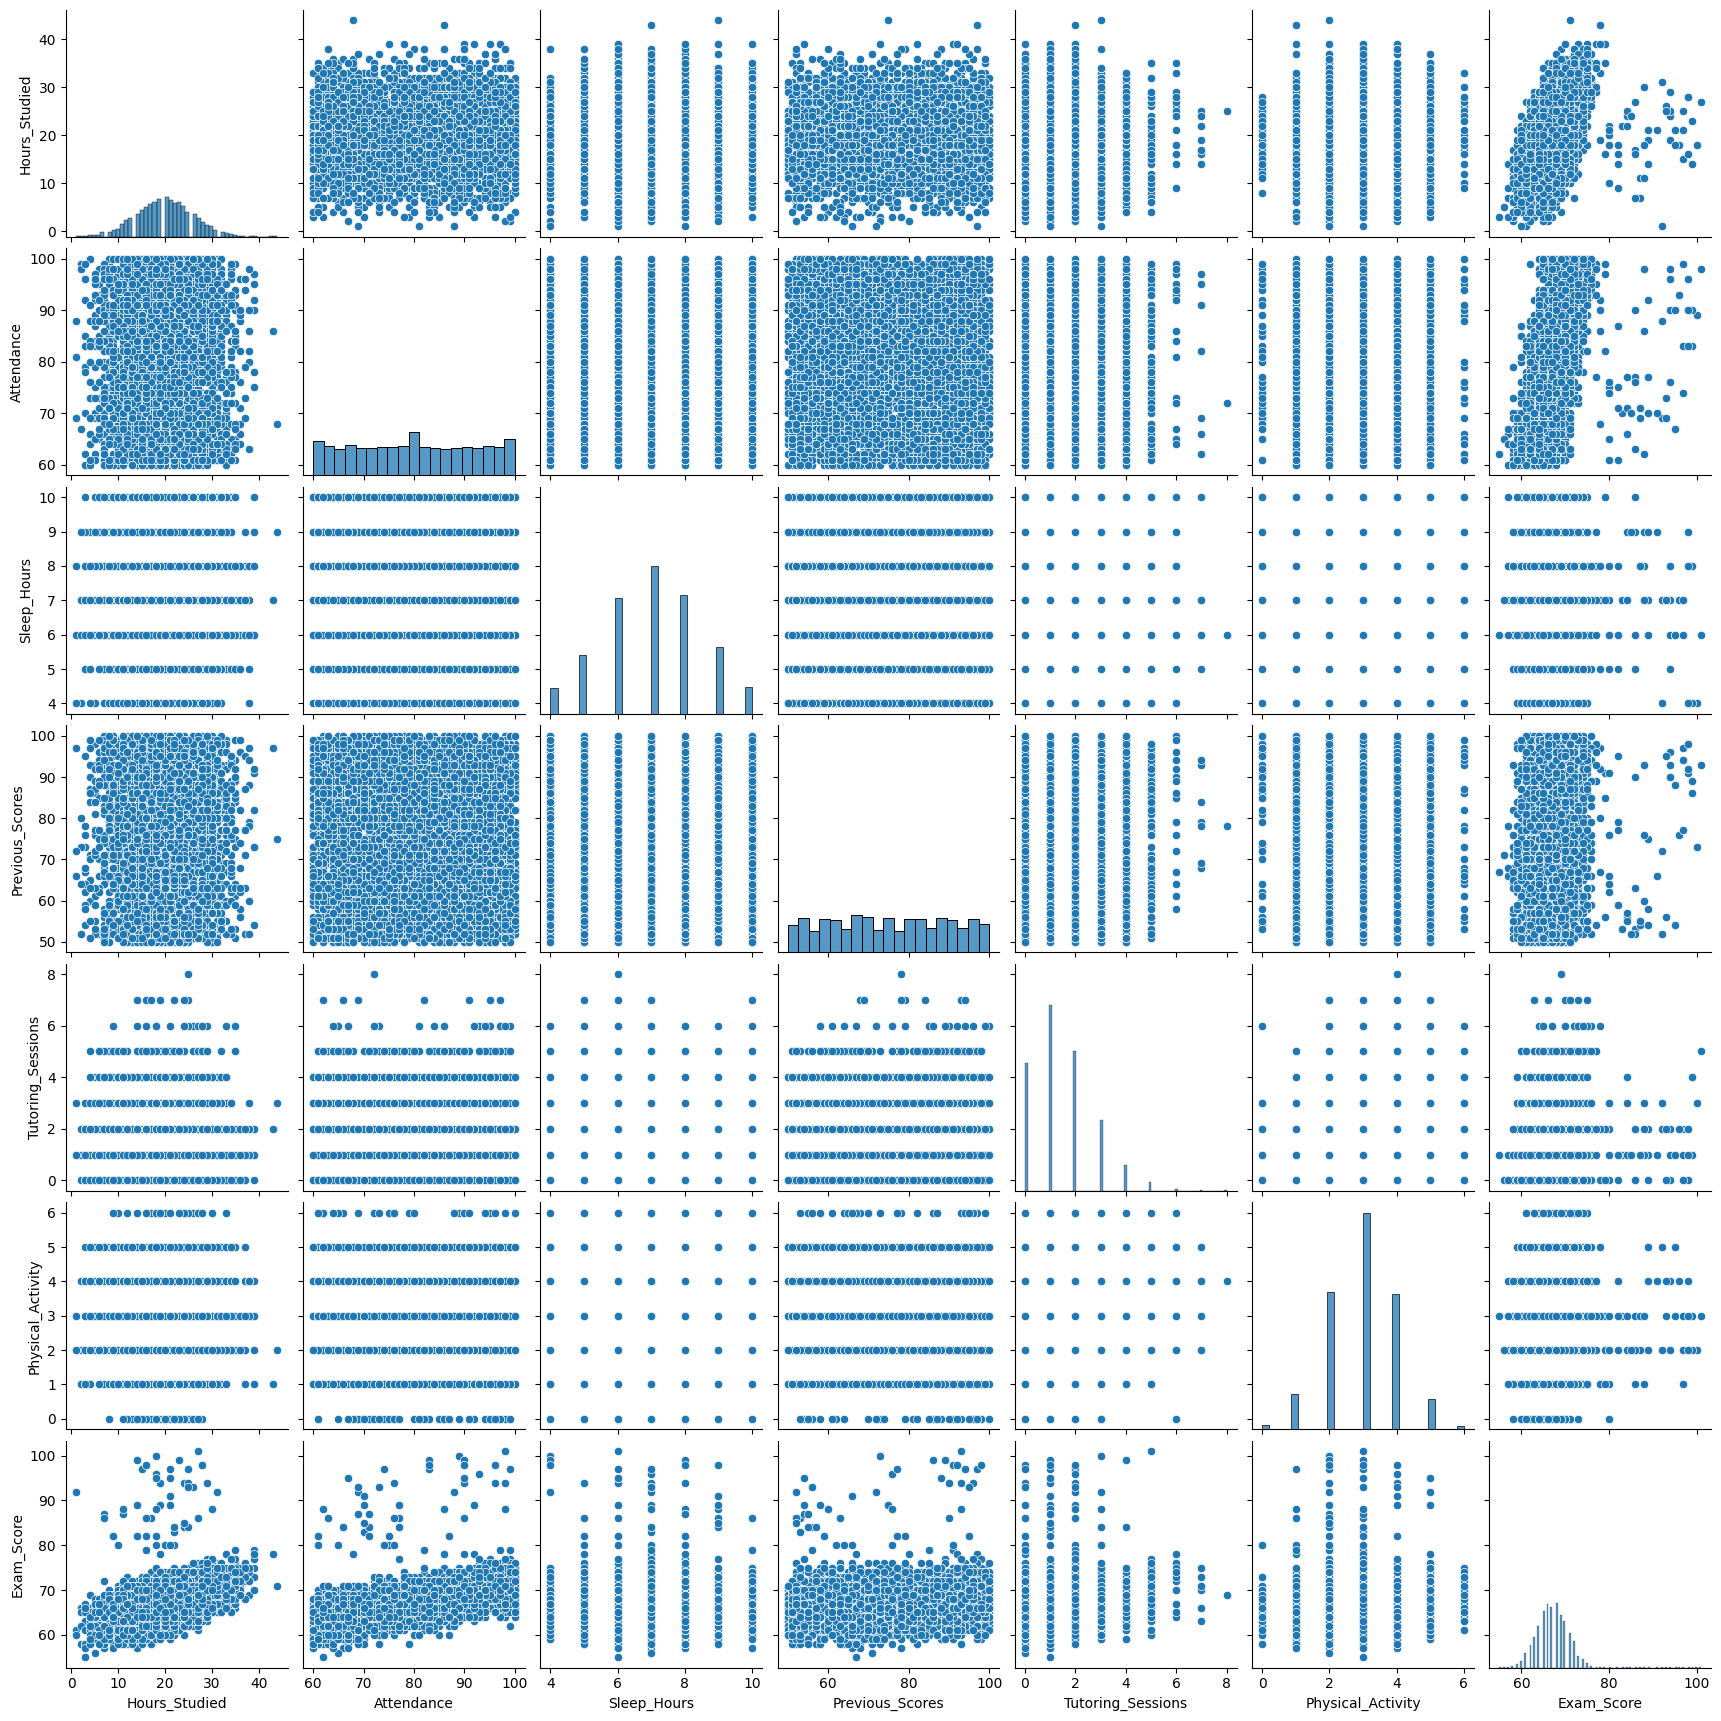

In [11]:
sns.pairplot(df_cleaned[numerical_cols])
plt.show()


7. Pie Charts (For categorical distributions)

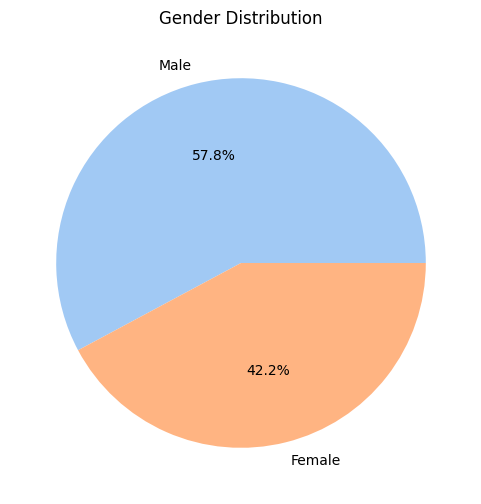

In [12]:
gender_counts = df_cleaned['Gender'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Gender Distribution')
plt.show()


Parental Involvement

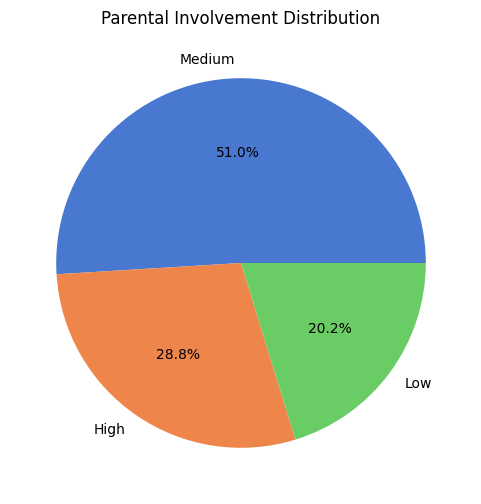

In [13]:
parental_involvement = df_cleaned['Parental_Involvement'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(parental_involvement, labels=parental_involvement.index, autopct='%1.1f%%', colors=sns.color_palette('muted'))
plt.title('Parental Involvement Distribution')
plt.show()


8. Count Plots (Bar Charts)

A. Count of Students by School Type

<ipython-input-14-027faf1a3f49>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x='School_Type', palette='pastel')


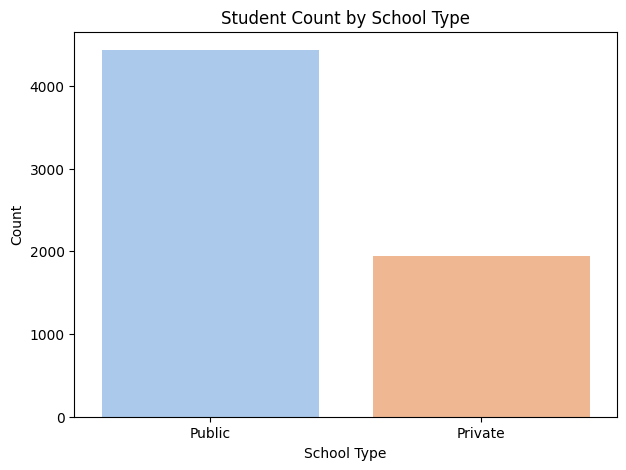

In [14]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df_cleaned, x='School_Type', palette='pastel')
plt.title('Student Count by School Type')
plt.xlabel('School Type')
plt.ylabel('Count')
plt.show()


B. Internet Access vs Exam Score (Grouped Bars)

<ipython-input-15-e6a6f3eb8343>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_cleaned, x='Internet_Access', y='Exam_Score', palette='Set2')


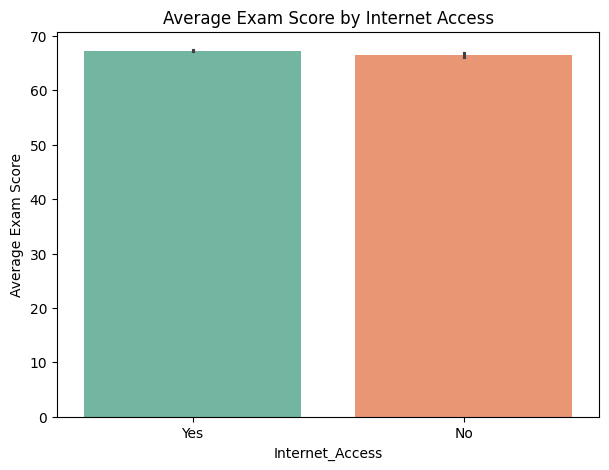

In [15]:
plt.figure(figsize=(7, 5))
sns.barplot(data=df_cleaned, x='Internet_Access', y='Exam_Score', palette='Set2')
plt.title('Average Exam Score by Internet Access')
plt.ylabel('Average Exam Score')
plt.show()


<ipython-input-16-f2df610f2dfd>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x='Physical_Activity', y='Exam_Score', palette='Set1')


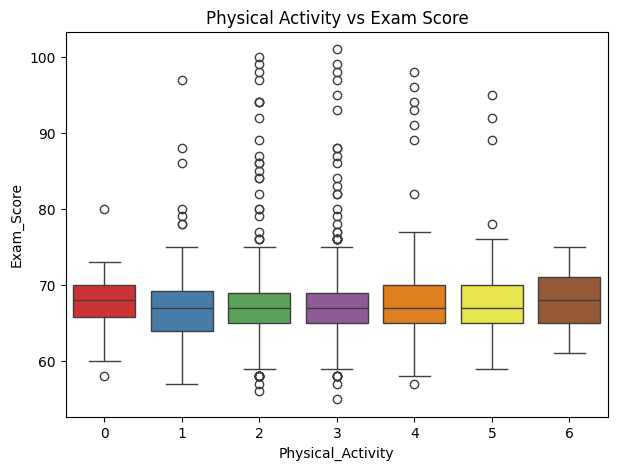

In [16]:
plt.figure(figsize=(7, 5))
sns.boxplot(data=df_cleaned, x='Physical_Activity', y='Exam_Score', palette='Set1')
plt.title('Physical Activity vs Exam Score')
plt.show()


<ipython-input-17-3fb8507de113>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x='Learning_Disabilities', y='Exam_Score', palette='cool')


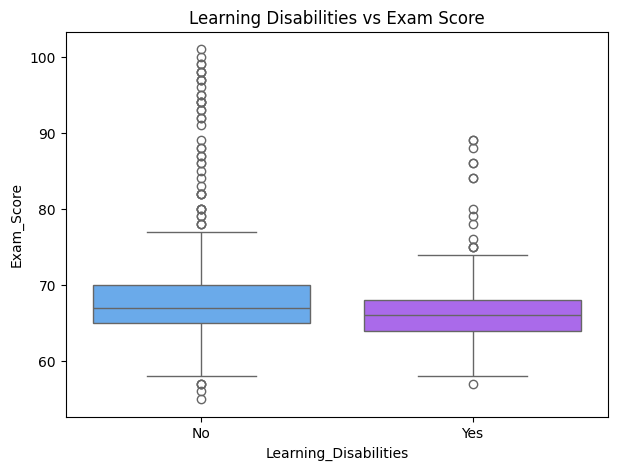

In [17]:
plt.figure(figsize=(7, 5))
sns.boxplot(data=df_cleaned, x='Learning_Disabilities', y='Exam_Score', palette='cool')
plt.title('Learning Disabilities vs Exam Score')
plt.show()


<ipython-input-18-b5baa8bb79f0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x='Family_Income', y='Exam_Score', palette='Spectral')


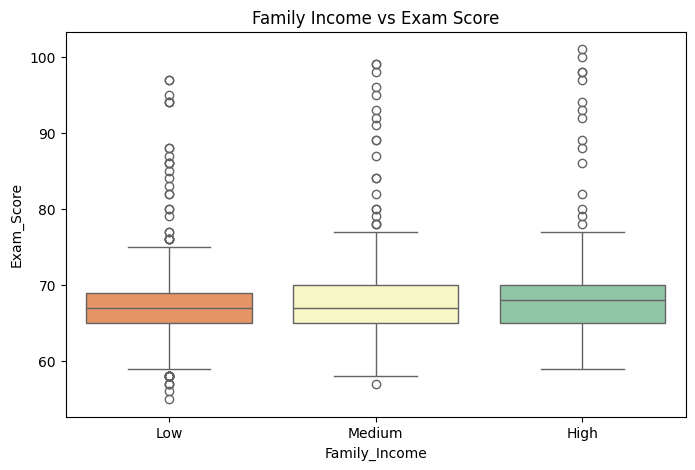

In [18]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_cleaned, x='Family_Income', y='Exam_Score', palette='Spectral')
plt.title('Family Income vs Exam Score')
plt.show()


 Pairwise Comparison of Key Features

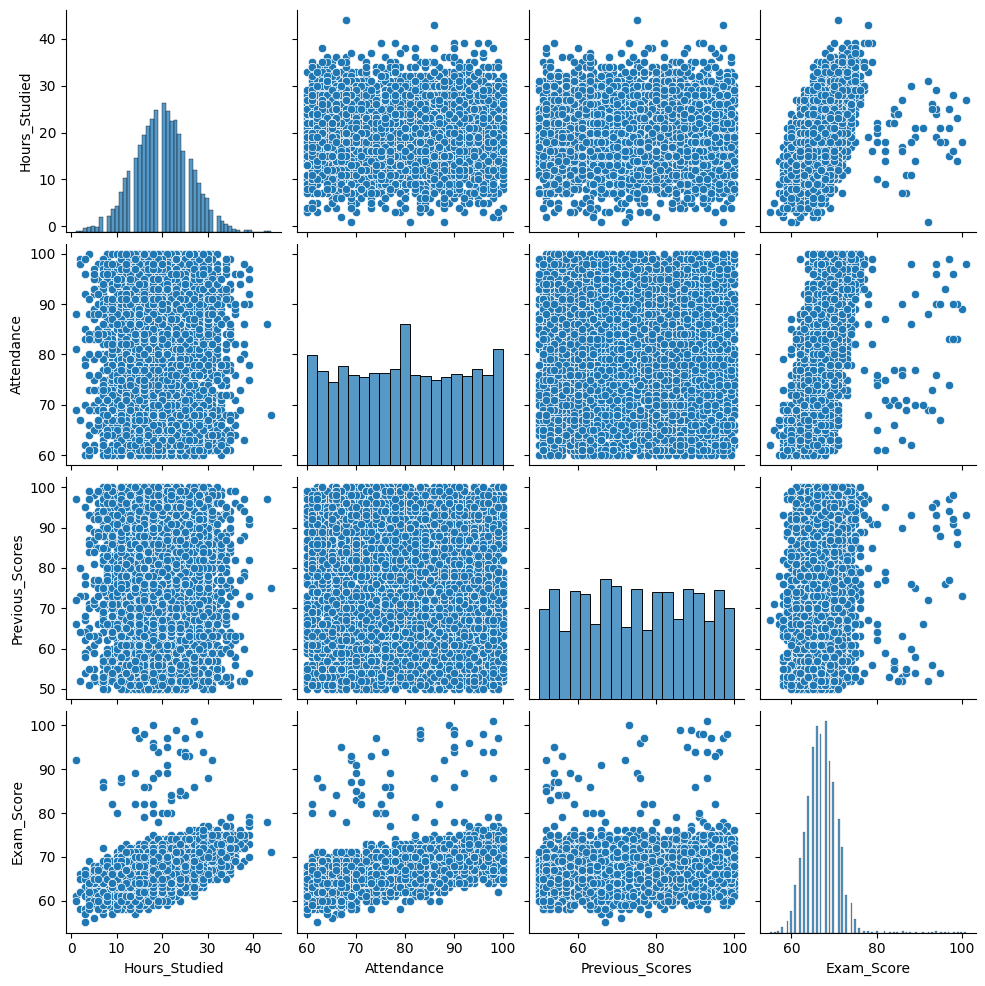

In [19]:
key_features = ['Hours_Studied', 'Attendance', 'Previous_Scores', 'Exam_Score']
sns.pairplot(df_cleaned[key_features])
plt.show()


# CONCLUSION:

Visualizations Performed:
1. 📈 Distribution Plot
Histogram + KDE for Exam_Score to understand score spread.

2. 🔥 Correlation Heatmap
Showed relationships among numerical features like Hours_Studied, Sleep_Hours, Previous_Scores, and Exam_Score.

3. 📦 Box Plots
Analyzed effect of categorical features on Exam_Score, such as:

Parental_Involvement

Access_to_Resources

Gender

Parental_Education_Level

Physical_Activity

Learning_Disabilities

Family_Income

4. 🥧 Pie Charts
Distribution of students by:

Gender

Parental_Involvement

5. 📊 Count & Bar Plots
Student count by School_Type

Average exam scores based on:

Internet_Access

Family_Income

6. 🔄 Pair Plot
Visualized pairwise relationships among:

Hours_Studied

Attendance

Previous_Scores

Exam_Score